Utilizando a rede neural RBF com 4 centros, encontre os pesos da rede para aproximar a função sen(x)+4cos(x)-1  usando 21 pontos do intervalo [-2, 4]

Gere o gráfico da função desejada e da função aproximada pela RBF.

### Importar bibliotecas e definir a função original.

In [19]:
import torch # pytorch rede nelral 
import numpy as np # numpy para auxiliar 
import matplotlib.pyplot as plt # # para plotar os graficos solicitados

Definir a função a ser aproximada e gerar os pontos no intervalo [-2, 4] e gera os valores espaçados igualmente para usar no treinamento

In [20]:
# Definição da função a ser aproximada
def funcao_poj_4(x):
    return torch.sin(x) + 4 * torch.cos(x) - 1

# Gerar 21 pontos no intervalo [-2, 4]
valores_x = torch.linspace(-2, 4, 21) # função magica!!! do pytorch para pegar os 21valores
valores_y = funcao_poj_4(valores_x) # entra na função (funcao_poj_4) e retorna as respostas em Y

Criar a arquitetura da rede neural RBF utilizando pytorch

In [21]:
class RBFNet(torch.nn.Module):
    def __init__(self, numero_centros):
        super(RBFNet, self).__init__()
        self.numero_centros = numero_centros
        self.centers = torch.nn.Parameter(torch.linspace(-2, 4, self.numero_centros))
        self.beta = torch.nn.Parameter(torch.ones(self.numero_centros))
        self.linear = torch.nn.Linear(self.numero_centros, 1, bias=False)

    def forward(self, x):
        radial_functions = torch.exp(-self.beta * (x.unsqueeze(1) - self.centers)**2)
        return self.linear(radial_functions)


Area de treinamento para a rede

In [25]:
# Instanciar o modelo RBF e definir a função de perda e otimizador
modelo = RBFNet(numero_centros=4)
criterion = torch.nn.MSELoss() # define a função de loss
otimizador = torch.optim.Adam(modelo.parameters(), lr=0.01)

# Treinamento da rede
numero_epocas = 1000 # define o numero de epocas a ser treinada

for epoch in range(numero_epocas):
    otimizador.zero_grad()
    output = modelo(valores_x)
    loss = criterion(output.squeeze(), valores_y)
    loss.backward()
    otimizador.step()
    
    if (epoch+1) % 100 == 0: # printa os nalores de epocas e loss
        print(f'Epoch [{epoch+1}/{numero_epocas}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 4.7288
Epoch [200/1000], Loss: 1.1264
Epoch [300/1000], Loss: 0.2960
Epoch [400/1000], Loss: 0.0868
Epoch [500/1000], Loss: 0.0298
Epoch [600/1000], Loss: 0.0121
Epoch [700/1000], Loss: 0.0059
Epoch [800/1000], Loss: 0.0036
Epoch [900/1000], Loss: 0.0025
Epoch [1000/1000], Loss: 0.0019


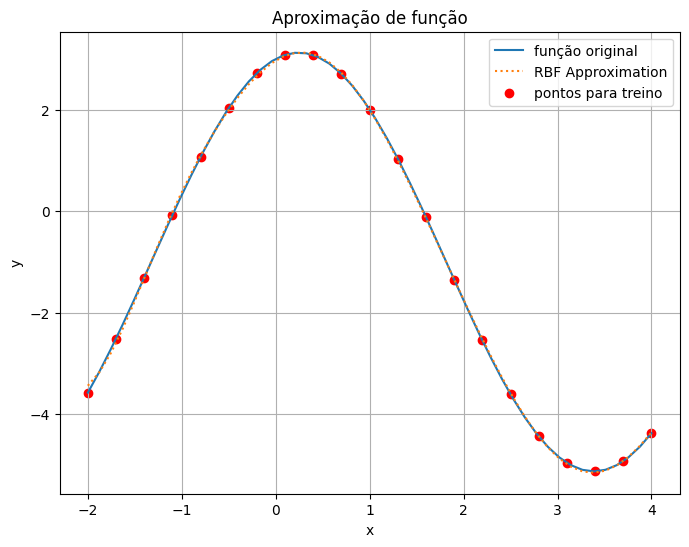

In [51]:
# Converter para numpy para plotagem
x_plot = np.linspace(-2, 4) # define o espaço
y_original = funcao_poj_4(torch.Tensor(x_plot)).detach().numpy() # define os valores de y para aparecerem no grafico em azul no caso
y_aproximado = modelo(torch.Tensor(x_plot)).detach().numpy() # define os valores e y aproximados feitos pelo modelo

# Plotagem do gráfico
plt.figure(figsize=(8, 6)) # almenta a figura
plt.plot(x_plot, y_original, label='função original')
plt.plot(x_plot, y_aproximado, label='RBF Approximation', linestyle=':')
plt.scatter(valores_x, valores_y, color='red', label='pontos para treino')
plt.title('Aproximação de função')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Vendo que apenas chutei o numero de epocas tive a ideia de ver como através do numero de epocas poderia ver a converção da rede

In [45]:
# Função de treinamento do modelo com número variável de épocas
def modelo_treinamento(numero_epocas):
    # Instanciar o modelo RBF
    modelo = RBFNet(numero_centros=4)
    criterion = torch.nn.MSELoss()
    otimizador = torch.optim.Adam(modelo.parameters(), lr=0.01)

    # Treinamento da rede
    for epoch in range(numero_epocas):
        otimizador.zero_grad()
        output = modelo(valores_x)
        loss = criterion(output.squeeze(), valores_y)
        loss.backward()
        otimizador.step()
    
    return modelo

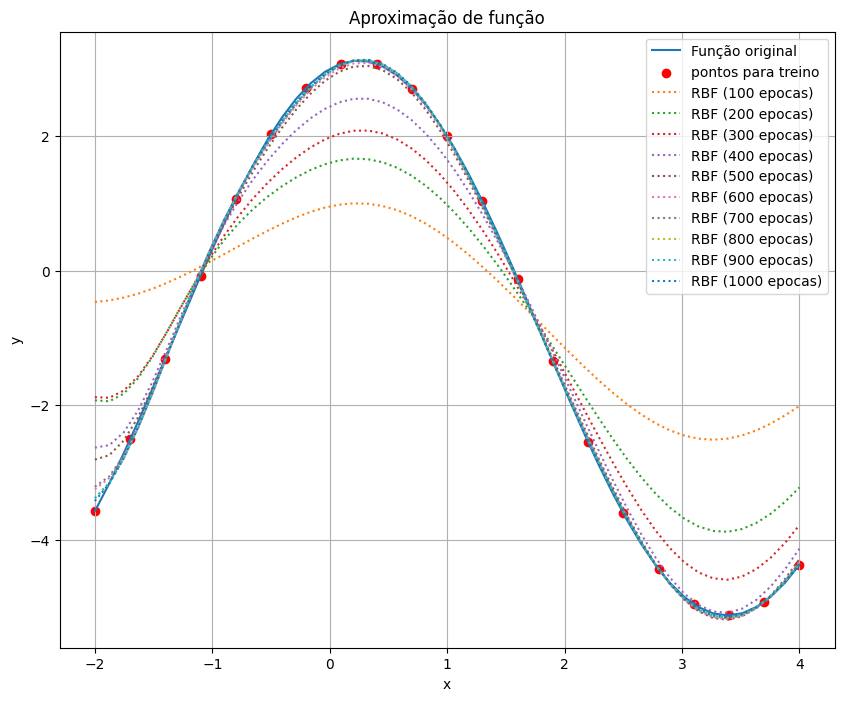

In [49]:
# Plotagem do gráfico para diferentes quantidades de épocas (de 100 a 1000)
plt.figure(figsize=(10, 8)) # almenta a figura para ser mais facil de ver
x_plot = np.linspace(-2, 4) # define o intervalo

# Plot da função original
y_original = funcao_poj_4(torch.Tensor(x_plot)).detach().numpy()
plt.plot(x_plot, y_original, label='Função original')

plt.scatter(valores_x, valores_y, color='red', label='pontos para treino') # os pontos em vermelho são os pontos selecionados para o treinamento 21 no total

# Plot das funções aproximadas para diferentes números de épocas
for numero_epocas in range(100, 1001, 100):
    modelo_treinado = modelo_treinamento(numero_epocas)
    y_aproximado = modelo_treinado(torch.Tensor(x_plot)).detach().numpy()
    plt.plot(x_plot, y_aproximado, label=f'RBF ({numero_epocas} epocas)', linestyle=':')

plt.title('Aproximação de função')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()